## Este projeto é da autoria de [José Gama](https://github.com/mixmaxze).
 O objetivo é limpar e fazer uma análise exploratória dos dados referentes aos preços dos medicamentos que circulam pelo Brasil.<br>
 Esses dados estão disponíveis no site do governo. Você os encontra [aqui](https://dados.gov.br/dataset/ef3d5f8b-1661-4381-a369-4aed487bf313/resource/84531c98-b162-4c00-ae21-002192a51051).
 

In [1]:
# Importando bibliotecas

import pandas as pd
from matplotlib import pyplot as plt
from unidecode import unidecode

In [2]:
# Carregando os DataFrames

df = pd.read_csv('dados/TA_PRECO_MEDICAMENTO.csv', sep=';', low_memory=False)
codigos_gs1 = pd.read_csv('dados/codigos_gs1.csv', sep=',')

In [3]:
# Todas os atributos disponíveis no dataset de medicamentos

df.columns

Index(['SUBSTÂNCIA', 'CNPJ', 'LABORATÓRIO', 'CÓDIGO GGREM', 'REGISTRO',
       'EAN 1', 'EAN 2', 'EAN 3', 'PRODUTO', 'APRESENTAÇÃO',
       'CLASSE TERAPÊUTICA', 'TIPO DE PRODUTO (STATUS DO PRODUTO)',
       'REGIME DE PREÇO', 'PF Sem Impostos', 'PF 0%', 'PF 12%', 'PF 17%',
       'PF 17% ALC', 'PF 17,5%', 'PF 17,5% ALC', 'PF 18%', 'PF 18% ALC',
       'PF 20%', 'PMC 0%', 'PMC 12%', 'PMC 17%', 'PMC 17% ALC', 'PMC 17,5%',
       'PMC 17,5% ALC', 'PMC 18%', 'PMC 18% ALC', 'PMC 20%',
       'RESTRIÇÃO HOSPITALAR', 'CAP', 'CONFAZ 87', 'ICMS 0%',
       'ANÁLISE RECURSAL',
       'LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)',
       'COMERCIALIZAÇÃO 2019', 'TARJA'],
      dtype='object')

### A descrição desses atributos está disponível [aqui](https://github.com/mixmaxze/precos-medicamentos-brasil/blob/main/dados/dicionario_dados.pdf).

In [4]:
# Uma visualização base sobre o dataset

df.head

<bound method NDFrame.head of                   SUBSTÂNCIA                CNPJ  \
0      ACETATO DE LANREOTIDA  07.718.721/0001-80   
1                  ACICLOVIR  45.992.062/0001-65   
2                  ACICLOVIR  45.992.062/0001-65   
3                  ACICLOVIR  45.992.062/0001-65   
4         ACTAEA RACEMOSA L.  78.950.011/0001-20   
...                      ...                 ...   
25986              ZOPICLONA  02.685.377/0001-57   
25987          ZUCLOPENTIXOL  04.522.600/0001-70   
25988          ZUCLOPENTIXOL  04.522.600/0001-70   
25989          ZUCLOPENTIXOL  04.522.600/0001-70   
25990          ZUCLOPENTIXOL  04.522.600/0001-70   

                               LABORATÓRIO     CÓDIGO GGREM       REGISTRO  \
0         BEAUFOUR IPSEN FARMACÊUTICA LTDA  539220120001407  1697700020094   
1                 GERMED FARMACEUTICA LTDA  526120110126207  1058309640048   
2                 GERMED FARMACEUTICA LTDA  526120110126307  1058309640056   
3                 GERMED FARMACEU

In [5]:
# Tamanho do dataset (linhas, colunas)

df.shape

(25991, 40)

## Limpeza dos dados
**1. Renomeando as colunas: <br>
Para tornar mais simples o acesso às colunas, irei renomeá-las com letras minúsculas e sem acentos. <br>Depois, irei abreviar algumas colunas com termos menores e remover as que não serão usadas.**

In [6]:
df.columns = [str.lower(x) for x in df.columns] # deixando as letras minúsculas
df.columns = [str.replace(x, ' ','_') for x in df. columns] # substituindo espaços por underline
df.columns = [unidecode(x) for x in df.columns] # retirando os acentos
df.columns

Index(['substancia', 'cnpj', 'laboratorio', 'codigo_ggrem', 'registro',
       'ean_1', 'ean_2', 'ean_3', 'produto', 'apresentacao',
       'classe_terapeutica', 'tipo_de_produto_(status_do_produto)',
       'regime_de_preco', 'pf_sem_impostos', 'pf_0%', 'pf_12%', 'pf_17%',
       'pf_17%_alc', 'pf_17,5%', 'pf_17,5%_alc', 'pf_18%', 'pf_18%_alc',
       'pf_20%', 'pmc_0%', 'pmc_12%', 'pmc_17%', 'pmc_17%_alc', 'pmc_17,5%',
       'pmc_17,5%_alc', 'pmc_18%', 'pmc_18%_alc', 'pmc_20%',
       'restricao_hospitalar', 'cap', 'confaz_87', 'icms_0%',
       'analise_recursal',
       'lista_de_concessao_de_credito_tributario_(pis/cofins)',
       'comercializacao_2019', 'tarja'],
      dtype='object')

In [7]:
df.rename(columns={'laboratorio': 'lab', 'tipo_de_produto_(status_do_produto)': 'status_produto',
                  'regime_de_preco': 'regime_preco', 'lista_de_concessao_de_credito_tributario_(pis/cofins)': 'pis/cofins'},
                 inplace = True)
df.columns = [str.replace(x, '%', '') for x in df.columns] # removendo os símbolos de porcentagem
df.columns = [str.replace(x, ',', '.') for x in df.columns] # trocando vírgulas por pontos
df.columns

Index(['substancia', 'cnpj', 'lab', 'codigo_ggrem', 'registro', 'ean_1',
       'ean_2', 'ean_3', 'produto', 'apresentacao', 'classe_terapeutica',
       'status_produto', 'regime_preco', 'pf_sem_impostos', 'pf_0', 'pf_12',
       'pf_17', 'pf_17_alc', 'pf_17.5', 'pf_17.5_alc', 'pf_18', 'pf_18_alc',
       'pf_20', 'pmc_0', 'pmc_12', 'pmc_17', 'pmc_17_alc', 'pmc_17.5',
       'pmc_17.5_alc', 'pmc_18', 'pmc_18_alc', 'pmc_20',
       'restricao_hospitalar', 'cap', 'confaz_87', 'icms_0',
       'analise_recursal', 'pis/cofins', 'comercializacao_2019', 'tarja'],
      dtype='object')

In [8]:
df.drop(columns=['analise_recursal', 'cnpj', 'comercializacao_2019', 'codigo_ggrem', 'registro', 'confaz_87', 'pf_0', 'pf_12', 'pf_17', 'pf_17_alc', 'pf_17.5',
       'pf_17.5_alc', 'pf_18_alc', 'pf_20', 'pmc_0', 'pmc_12',
       'pmc_17', 'pmc_17_alc', 'pmc_17.5', 'pmc_17.5_alc',
       'pmc_18_alc', 'pmc_20', 'ean_2', 'ean_3'], inplace=True)
df.columns

Index(['substancia', 'lab', 'ean_1', 'produto', 'apresentacao',
       'classe_terapeutica', 'status_produto', 'regime_preco',
       'pf_sem_impostos', 'pf_18', 'pmc_18', 'restricao_hospitalar', 'cap',
       'icms_0', 'pis/cofins', 'tarja'],
      dtype='object')

**2. Corrigindo possíveis irregularidades nos valores**

In [9]:
# Verificando os tipos das colunas

df.dtypes

substancia              object
lab                     object
ean_1                   object
produto                 object
apresentacao            object
classe_terapeutica      object
status_produto          object
regime_preco            object
pf_sem_impostos         object
pf_18                   object
pmc_18                  object
restricao_hospitalar    object
cap                     object
icms_0                  object
pis/cofins              object
tarja                   object
dtype: object

In [10]:
# Transformando strings numéricas em float

# Primeiro, vamos substituir as vírgulas por pontos
for coluna in df.columns:
    df[coluna] = df[coluna].str.replace(',', '.')

In [11]:
# Agora vamos converter esses valores numéricos para o tipo float

colunas_numericas = ['pf_sem_impostos', 'pf_18', 'pmc_18']

for coluna in colunas_numericas:
    df[coluna] = df[coluna].astype(float)

In [12]:
# Verificando os novos tipos

df.dtypes

substancia               object
lab                      object
ean_1                    object
produto                  object
apresentacao             object
classe_terapeutica       object
status_produto           object
regime_preco             object
pf_sem_impostos         float64
pf_18                   float64
pmc_18                  float64
restricao_hospitalar     object
cap                      object
icms_0                   object
pis/cofins               object
tarja                    object
dtype: object

In [13]:
# Verificando quais colunas possuem valores nulos

df.isnull().sum().sort_values(ascending= False)[0:17]

pmc_18                  4554
pf_18                    810
substancia                 0
lab                        0
ean_1                      0
produto                    0
apresentacao               0
classe_terapeutica         0
status_produto             0
regime_preco               0
pf_sem_impostos            0
restricao_hospitalar       0
cap                        0
icms_0                     0
pis/cofins                 0
tarja                      0
dtype: int64

In [14]:
# Substituindo os preços nulos pela mediana 

for coluna in colunas_numericas:
    mediana = df[coluna].median()
    df[coluna].fillna(mediana, inplace = True)

In [15]:
# Verificando se os valores nulos sumiram

df.isnull().sum().sort_values(ascending= False)[0:17]

substancia              0
lab                     0
ean_1                   0
produto                 0
apresentacao            0
classe_terapeutica      0
status_produto          0
regime_preco            0
pf_sem_impostos         0
pf_18                   0
pmc_18                  0
restricao_hospitalar    0
cap                     0
icms_0                  0
pis/cofins              0
tarja                   0
dtype: int64

In [16]:
# Alterando o dataFrame dos códigos

codigos_gs1 = codigos_gs1[['codigo_gs1', 'pais']]
codigos_gs1.set_index('codigo_gs1', inplace=True)

In [17]:
# Substituindo os códigos EAN pelo país de origem a partir do dataFrame de codigos_gs1

def pais_origem(codigo):
    try:
        return codigos_gs1.loc[int(codigo[0:3].lstrip('0'))].pais
    except(KeyError, ValueError):
        return ''

df.rename(columns={'ean_1':'pais_origem'}, inplace=True)
df['pais_origem'] = df['pais_origem'].map(pais_origem)
df['pais_origem']

0           Brasil
1           Brasil
2           Brasil
3           Brasil
4           Brasil
           ...    
25986       Brasil
25987    Dinamarca
25988    Dinamarca
25989    Dinamarca
25990    Dinamarca
Name: pais_origem, Length: 25991, dtype: object

**3. Analisando os dados** <br>
Para comparação de preços utilizarei o pmc_18, pois essa alíquota de 18%, aplicada no preço máximo ao consumidor, é a presente na maioria dos estados brasileiros. 

**Verificando quais os 15 medicamentos mais caros e suas respectivas substâncias, classes terapêuticas e tarjas**<br>

Percebe-se que boa parte dos medicamentos mais caros são de tarja vermelha, ou seja:
**precisam de receita médica**, pois são destinados a quadros clínicos que exigem maior cuidado e controle. Por isso, alguns precisam que a receita seja retida, pois são _fármacos controlados e psicotrópicos_, que podem causar dependência e trazer muitos efeitos colaterais e contraindicações.

Percebe-se também que a maioria desses medicamentos mais caros são usados para tratar problemas no **aparelho digestório.**

In [19]:
df[['produto', 'substancia', 'pmc_18', 'classe_terapeutica', 'tarja']].sort_values(by='pmc_18', ascending=False)[0:14]

,produto,substancia,pmc_18,classe_terapeutica,tarja
13080,EXHER,EVEROLIMO,545571.53,L1H9 - OUTROS ANTINEOPLÁSICOS INIBIDORES DA PR...,Tarja Vermelha(*)
1388,STRENSIQ,ALFA-ASFOTASE,386890.87,A16A - OUTROS PRODUTOS PARA O APARELHO DIGESTÓ...,Tarja Vermelha(*)
14307,GIVLAARI,GIVOSIRANA SÓDICA,349406.86,A16A - OUTROS PRODUTOS PARA O APARELHO DIGESTÓ...,Tarja -(*)
13076,EXHER,EVEROLIMO,272785.32,L1H9 - OUTROS ANTINEOPLÁSICOS INIBIDORES DA PR...,Tarja Vermelha (*)
23703,SOFOSBUVIR,SOFOSBUVIR,223931.28,J5D3 - ANTIVIRAIS PARA HEPATITE C,Tarja Vermelha
13079,EXHER,EVEROLIMO,218228.64,L1H9 - OUTROS ANTINEOPLÁSICOS INIBIDORES DA PR...,Tarja Vermelha(*)
2101,TRANSLARNA,ATALURENO,205458.72,M5X - TODOS OS OUTROS FÁRMACOS COM AÇÃO MÚSCUL...,Tarja Vermelha(*)
23705,SOPHIR,SOFOSBUVIR,204266.93,J5D2 - ANTIVIRAIS PARA HEPATITE B,Tarja -(*)
1385,STRENSIQ,ALFA-ASFOTASE,193445.43,A16A - OUTROS PRODUTOS PARA O APARELHO DIGESTÓ...,Tarja Vermelha (*)
15207,CERDELGA,HEMITARTARATO DE ELIGLUSTATE,172671.20,A16A - OUTROS PRODUTOS PARA O APARELHO DIGESTÓ...,Tarja -(*)


Text(0.5, 0, 'Tipos de preços')

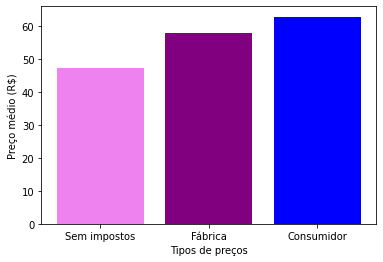

In [20]:
# Comparando preços sem impostos, preços de fábrica e preços de consumidor 

titulos_eixo_x = ['Sem impostos', 'Fábrica', 'Consumidor']
preco_sem_impostos_media = df['pf_sem_impostos'].median()
preco_fabrica_media = df['pf_18'].median()
preco_consumidor_media = df['pmc_18'].median()

medias_precos = [preco_sem_impostos_media, preco_fabrica_media, preco_consumidor_media]

plt.bar(titulos_eixo_x, medias_precos, color=['violet', 'purple', 'blue'])
plt.ylabel('Preço médio (R$)')
plt.xlabel('Tipos de preços')

In [21]:
# Verificando de quais países vêm a maioria dos medicamentos

df['pais_origem'].value_counts()

Brasil                  25050
Índia                     381
                          348
Reino Unido                73
Dinamarca                  54
México                     21
Argentina                  21
Áustria                    12
República da Irlanda        9
Coreia do Sul               7
Uruguai                     5
US                          3
Venezuela                   3
Israel                      2
Chile                       2
Name: pais_origem, dtype: int64